# Упражнение 1

В данном упражнении на датасете Breast cancer wisconsin следует продемонстрировать работу моделей градиентного бустинга, xgboost, lightgbm и catboost.

Импортируйте необходимые библиотеки указанные в лекции.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import catboost
import xgboost
import lightgbm

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Загрузите датасет. Разделите датасет на тестовую и обучающую выборки

In [2]:
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Определите параметры

In [3]:
params = {'n_estimators': 100,
          'max_depth': 2,
          'min_samples_split': 6,
          'learning_rate': 0.01,
          'loss': 'ls'}

Обучите модель градиентного бустинга

In [4]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0669


C:\Users\Xiaomi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Постройте график качества обучения

Text(0.5, 1.0, 'Зависимость лосса от итерации')

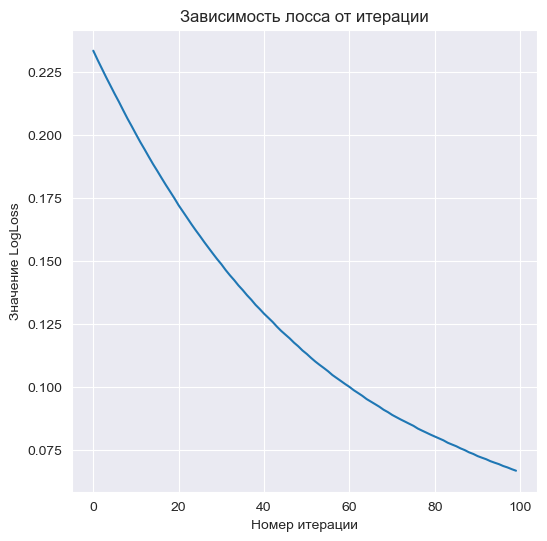

In [22]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.plot(np.arange(len(test_score)), test_score)
plt.xlabel('Номер итерации')
plt.ylabel('Значение LogLoss')
plt.title('Зависимость лосса от итерации')

По аналогии обучите модели xgboost, catboost и lightdm

In [70]:
xg_reg = xgboost.XGBRegressor(learning_rate = 0.1, max_depth = 5, alpha = 10, min_child_weight=9, n_estimators = 100, eval_metric=["rmse"])

lgg_reg = lightgbm.LGBMRegressor(n_estimators=1000, max_depth=-1, num_leaves=100, min_child_weight=7, n_jobs=-1)

cat_reg = catboost.CatBoostRegressor(iterations=1000, depth=6, min_data_in_leaf=7, verbose=0, eval_metric="RMSE")

eval_set = [(X_train, y_train), (X_test, y_test)]

xg_reg.fit(X_train, y_train, eval_set=eval_set, verbose=False)
xg_reg_pred = xg_reg.predict(X_test)
xg_reg_scores = xg_reg.evals_result()

lgg_reg.fit(X_train, y_train, eval_set=eval_set, verbose=False)
lgg_reg_pred = lgg_reg.predict(X_test)
lgg_reg_scores = lgg_reg.evals_result_

cat_reg.fit(X_train, y_train, eval_set=eval_set, verbose=False)
cat_reg_pred = cat_reg.predict(X_test)
cat_reg_scores = cat_reg.get_evals_result()

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


In [75]:
lgg_reg_scores['valid_1']['l2']

[0.20035225607450508,
 0.1690757468743101,
 0.14390108837111934,
 0.12403317083071339,
 0.10692997672599129,
 0.09263789740003671,
 0.08102009708257892,
 0.07229834830823562,
 0.06395646294087581,
 0.05742772676802907,
 0.052156169259768466,
 0.046915203599140136,
 0.042619347332840125,
 0.03907783918871875,
 0.03722431486167014,
 0.035162675822900315,
 0.03319147478308773,
 0.031964697077598525,
 0.030970720868271316,
 0.03070841016851845,
 0.030625393753225094,
 0.030627793334438578,
 0.029782435256165137,
 0.029786503643232053,
 0.029211064767194837,
 0.02888171319204015,
 0.02853135909811516,
 0.028263384743217726,
 0.027502662917412667,
 0.027309460169048554,
 0.026954529044650767,
 0.027307222378262257,
 0.027264465852920937,
 0.027171550652799047,
 0.027320666124427212,
 0.027032098260768234,
 0.027217302381871516,
 0.027076826951717863,
 0.027254478186793957,
 0.027291803497822467,
 0.02737234777590133,
 0.027527499212423256,
 0.027686493984317072,
 0.02807526280325196,
 0.0279

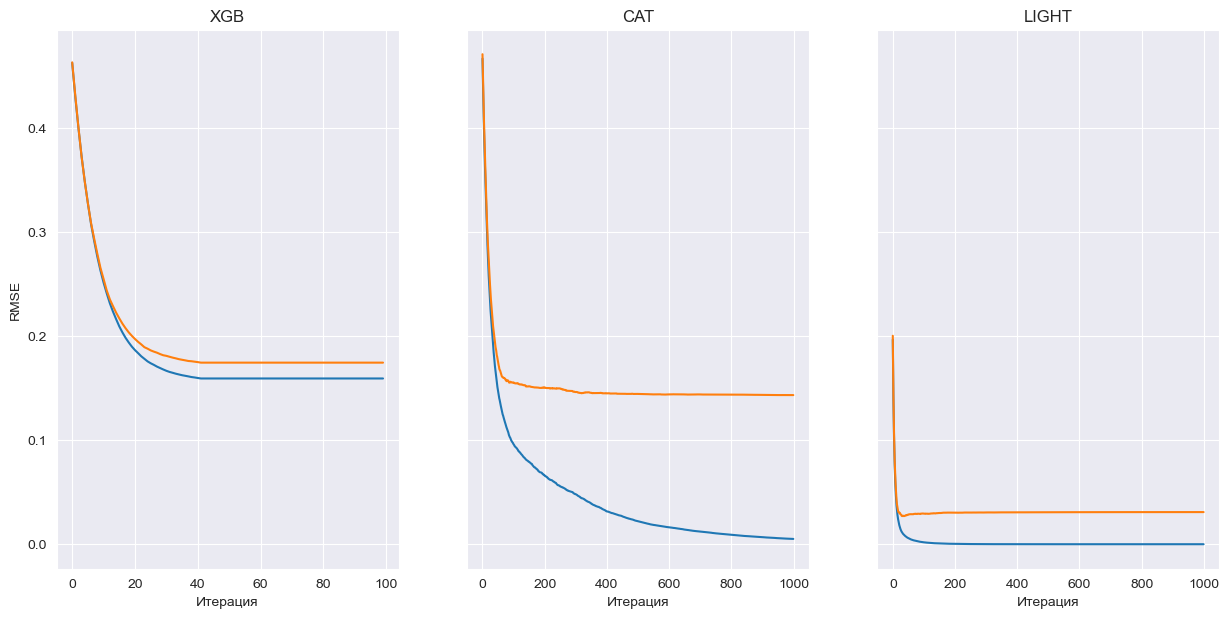

In [90]:
fig, ax = plt.subplots(figsize=(15,7), ncols=3, sharey=True)
ax[0].plot(np.arange(len(xg_reg_scores['validation_0']['rmse'])), xg_reg_scores['validation_0']['rmse'])
ax[0].plot(np.arange(len(xg_reg_scores['validation_1']['rmse'])), xg_reg_scores['validation_1']['rmse'])
ax[0].set_title('XGB')
ax[0].set_xlabel('Итерация')
ax[0].set_ylabel('RMSE')

ax[1].plot(np.arange(len(cat_reg_scores['validation_0']['RMSE'])), cat_reg_scores['validation_0']['RMSE'])
ax[1].plot(np.arange(len(cat_reg_scores['validation_1']['RMSE'])), cat_reg_scores['validation_1']['RMSE'])
ax[1].set_title('CAT')
ax[1].set_xlabel('Итерация')

ax[2].plot(np.arange(len(lgg_reg_scores['training']['l2'])), lgg_reg_scores['training']['l2'])
ax[2].plot(np.arange(len(lgg_reg_scores['valid_1']['l2'])), lgg_reg_scores['valid_1']['l2'])
ax[2].set_title('LIGHT')
ax[2].set_xlabel('Итерация')

plt.show()

**Вывод:**
На наивном бэйслайне лайтгбм моментально переобучился из-за безграничной глубины дерева (не получилось выставить ту же метрику, так что на графике lightGBM - $RMSE^2$).

Определите важность признаков используя Gini impurity и SHAP

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install shap
import shap


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
##Use Gini and Shap

explainer = shap.Explainer(your_reg)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])

Отобразите графики (Дополнительно)

In [ ]:
plt.figure(figsize=(8,8))
#Other data

#Упражнение 2

В данном упражнении вам нужно будет оценить важность функциональный групп во взаимодействиях с заданным белком

Загрузите датасет

In [94]:
# !wget https://zenodo.org/record/3362353/files/activity_classes_ChEMBL24.dat?download=1
import urllib.request
urllib.request.urlretrieve("https://zenodo.org/record/3362353/files/activity_classes_ChEMBL24.dat?download=1", "activity_classes_ChEMBL24.dat")

('activity_classes_ChEMBL24.dat', <http.client.HTTPMessage at 0x2b66cb91340>)

In [92]:
!cat 'activity_classes_ChEMBL24.dat?download=1'

"cat" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Обработайте датасет и разделите его на тестовую выборку

In [95]:
activity_classes = []

with open('activity_classes_ChEMBL24.dat') as rf:
  for l in rf.readlines():
    line = [s.strip() for s in l.split('\t')]
    activity_classes.append(line)
import pandas as pd

df = pd.DataFrame(activity_classes)
df.columns = ['TargetID', 'TargetName', 'SMILES', 'AnalogSeriesID', 'pKi']
df = df.drop(df.index[0])
df

,TargetID,TargetName,SMILES,AnalogSeriesID,pKi
1,CHEMBL233,Mu opioid receptor,C#CCN1CCC23CCCCC2C1Cc4c3cc(cc4)O,1039,11.52
2,CHEMBL233,Mu opioid receptor,C#CCN1CN(C2(C1=O)CCN(CC2)C(c3ccccc3)c4ccccc4)c...,24317,5.37
3,CHEMBL233,Mu opioid receptor,CC(=NC(CO)C(=NCC1CC23CCC1(C4C25CCN(C3Cc6c5c(c(...,23111,8.23
4,CHEMBL233,Mu opioid receptor,CC(=NC(Cc1ccccc1)C(=NCC2CC34CCC2(C5C36CCN(C4Cc...,23111,9.44
5,CHEMBL233,Mu opioid receptor,CC(=O)CN1CN(C2(C1=O)CCN(CC2)C3CCC(c4c3cccc4)(C...,10988,7.85
...,...,...,...,...,...
5293,CHEMBL4792,Orexin receptor 2,c1ccc(c(c1)c2ncccn2)C(=O)N3C4CCC3C(C4)Nc5cnc(c...,6612,6.24
5294,CHEMBL4792,Orexin receptor 2,c1ccc(cc1)C2(CC2C(=O)Nc3ccccn3)COc4ccccc4,4774,6.01
5295,CHEMBL4792,Orexin receptor 2,c1ccc(cc1)CN2C(=O)CCCC23CCN(CC3)c4cnc5ccccc5n4,21610,6.51
5296,CHEMBL4792,Orexin receptor 2,c1ccc(cc1)CN2CCCC3(C2=O)CCN(CC3)c4[nH]c5ccccc5n4,15031,5.97


Установим rdkit, он вам пригодится.

In [96]:
!pip install rdkit-pypi

     ---------------------------------------- 20.2/20.2 MB 3.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
import rdkit
from rdkit import Chem 
from rdkit.Chem import Descriptors

Вытянем из последовательностей смайлз признаки.

In [98]:
def get_mol_features(s):
  mol = Chem.MolFromSmiles(s)

  tpsa = Descriptors.TPSA(mol)
  logp = Descriptors.MolLogP(mol)
  wt = Descriptors.ExactMolWt(mol)
  ch = Descriptors.MaxPartialCharge(mol)
  rad_e = Descriptors.NumRadicalElectrons(mol)
  val_e = Descriptors.NumValenceElectrons(mol)
  h_acc = Descriptors.NumHAcceptors(mol)
  h_don = Descriptors.NumHDonors(mol)
  ar_r = Descriptors.NumAromaticRings(mol)
  bal = Descriptors.BalabanJ(mol)
  ipc = Descriptors.Ipc(mol)
  nhoh = Descriptors.NHOHCount(mol)
  no = Descriptors.NOCount(mol)
  hka = Descriptors.HallKierAlpha(mol)
  lab = Descriptors.LabuteASA(mol)
  csp = Descriptors.FractionCSP3(mol)
  return tpsa, logp, wt, ch, rad_e, val_e, h_acc, h_don, ar_r, bal, ipc, nhoh, no, hka, lab, csp

In [99]:
features = []
smiles = df['SMILES']

for s in smiles:
  features.append(get_mol_features(s))

data = pd.DataFrame(features)
data.columns = ['tpsa', 'logp', 'wt', 'ch', 'rad_e', 'val_e', 'h_acc', 'h_don', 'ar_r', 'bal', 'ipc', 'nhoh', 'no', 'hka', 'lab', 'csp']
data['pKi'] = df['pKi'].values.astype(float)
data['smiles'] = df['SMILES'].values

Посмотрите что у вас получилось в data

In [105]:
y

0       11.52
1        5.37
2        8.23
3        9.44
4        7.85
        ...  
5292     6.24
5293     6.01
5294     6.51
5295     5.97
5296     6.59
Name: pKi, Length: 5297, dtype: float64

In [106]:
from sklearn.preprocessing import StandardScaler

X, y = data.iloc[:, :-2], data['pKi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#Разделите выборку на обучение и тест

Вфберите две модели, которые вам понравились из первого задания, обучите и проанализиуйте в SHAP

In [107]:
xg_reg = xgboost.XGBRegressor(learning_rate = 0.1, max_depth = 5, alpha = 10, min_child_weight=9, n_estimators = 10)

lgg_reg = lightgbm.LGBMRegressor(n_estimators=2000, learning_rate=0.1, max_depth=-1, num_leaves=100, min_child_weight=7, n_jobs=-1) 
##Add everything you need, if you need
explainer = shap.Explainer(your_reg)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])

NameError: name 'your_reg' is not defined

Сделайте выводы, есть ли разница между выбранными вами моделями. Какие параметры оказались важными.

Выводы